In [25]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


### Reading dataset

In [9]:
iris = pd.read_csv('/home/hasan/Downloads/datasets_19_420_Iris.csv')

### Summarize the dataset

In [10]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.shape

(150, 5)

In [17]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [15]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
# total number of every species
iris.groupby('Species')['Species'].agg(['count']).rename(columns={'count':'Total_number'}).sort_values(by='Total_number', ascending=False)


,Total_number
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


### Data Visualization

##### Univariate plots to better understand each attribute.

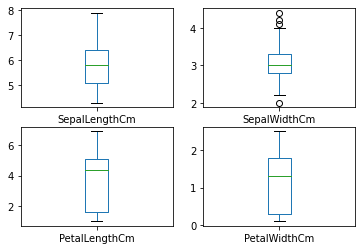

In [21]:
# box and whisker plots
iris.plot(kind= 'box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

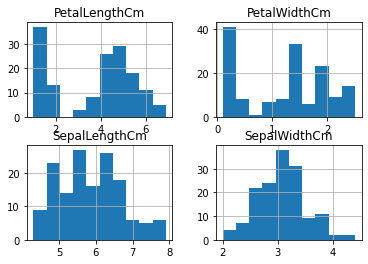

In [22]:
# histograms
iris.hist()
pyplot.show()

##### Multivariate plots to better understand the relationships between attributes.

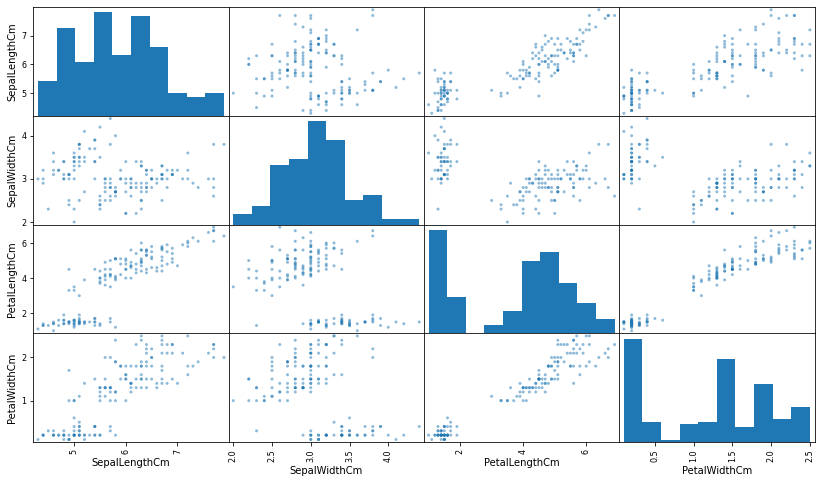

In [28]:
# scatter plot matrix
scatter_matrix(iris, figsize=(14,8))
pyplot.show()

### Dataset is converted to array

In [30]:
iris_array = iris.values

### Feature and Label data

In [31]:
X = iris_array[:,0:4]
y = iris_array[:,4]

### Dividing into Train test dataset

In [33]:
# Split-out validation dataset
validation_size = 0.20
seed = 7

Xtrain, xvalidation, Ytrain, yvalidation = train_test_split(X, y, test_size=validation_size, random_state=seed)


### Build Model

In [38]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logisti

### Compare Algorithms

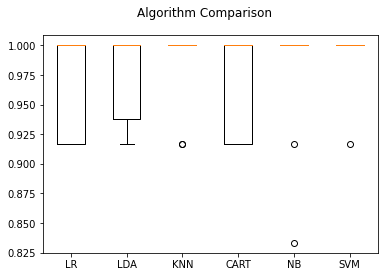

In [39]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Taking One Algorithm

In [41]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(Xtrain, Ytrain)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Predicting

In [43]:
predictions = knn.predict(xvalidation)


### Accuracy Score

In [44]:
print(accuracy_score(yvalidation, predictions))

0.9


### Confusion Matrix

In [46]:
print(confusion_matrix(yvalidation, predictions))

[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


### Classification Report

In [48]:
print(classification_report(yvalidation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



# Same Project Using Deep Learning

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV 
from keras.utils.np_utils import to_categorical
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense



### Reading dataset

In [126]:
iris = pd.read_csv('/home/hasan/DATA SET/iris.csv')

### Summarize the dataset

In [127]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [128]:
iris.shape

(150, 5)

In [129]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [130]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [131]:
# total number of every species
iris.groupby('Species')['Species'].agg(['count']).rename(columns={'count':'Total_number'}).sort_values(by='Total_number', ascending=False)


,Total_number
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


### Data Visualization

##### Univariate plots

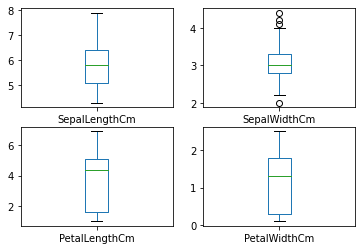

In [132]:
# box and whisker plots
iris.plot(kind= 'box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

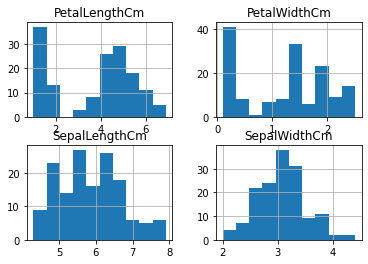

In [133]:
# histograms
iris.hist()
pyplot.show()

##### Multivariate plot

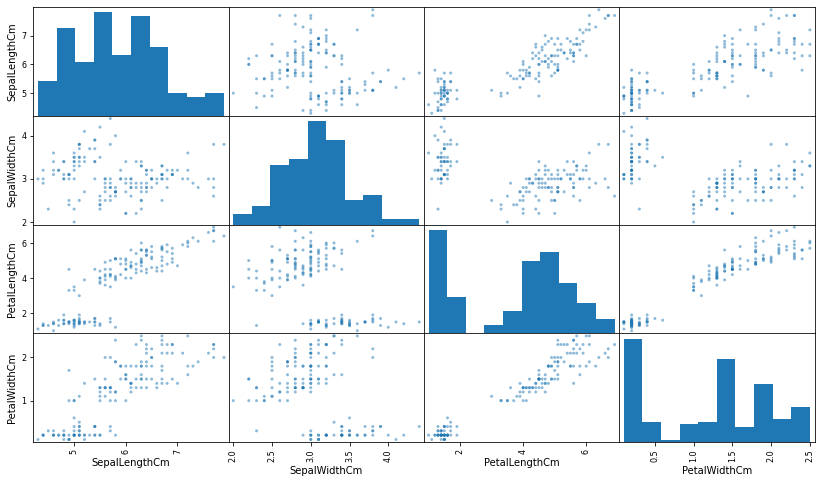

In [134]:
# scatter plot matrix
scatter_matrix(iris, figsize=(14,8))
pyplot.show()

### Taking only values

In [135]:
iris_array = iris.values

### Feature and Label data

In [136]:
X = iris_array[:,0:4]
y = iris_array[:,4]

### Encoding

In [137]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

dummy_y = to_categorical(encoded_y)
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

### Neural Network

In [138]:
def baseline_model():
    model = Sequential()
    model.add(Dense(50, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(3, kernel_initializer= 'normal', activation='sigmoid'))
    
    # Compile model
    model.compile(loss='mean_squared_error', 
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

### Data Standardize

In [139]:
estimators = []
estimators.append(('standardize', StandardScaler()))

### Keras Classifier

In [140]:
estimators.append(('mlp', KerasClassifier(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)

### K-Fold

In [141]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, dummy_y, cv=kfold)
print("Accuracy: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Accuracy: 0.95 (0.05) MSE
